In [34]:
# Each node in G is either a road intersection,
# a rail station or a metro station.

# Vertex : metro 356->303(type = metro), train 241, tram 146
# Edge : metro 367, train 246, tram 140

# Using Edge, Vertex List >>> Metro, Train Graph Create

In [35]:
%load_ext autoreload
%autoreload 

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import networkx as nx
import pandas as pd
from src.create import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
vertex_csv = "../data/vertex/vertex.csv"
edge_csv = "../data/edge/edge.csv"

G_train, df_vertex_train, df_edge_train = ParisTranspNetwork(vertex_csv,edge_csv,'train')
G_metro, df_vertex_metro, df_edge_metro = ParisTranspNetwork(vertex_csv,edge_csv,'metro')
G_tram, df_vertex_tram, df_edge_tram = ParisTranspNetwork(vertex_csv,edge_csv,'tram')
G_road, df_vertex_road, df_edge_road = ParisTranspNetwork(vertex_csv,edge_csv,'road')

In [80]:
G_train = Paris_NodeSetting(G_train, df_vertex_train,1)
G_metro = Paris_NodeSetting(G_metro, df_vertex_metro,2)
G_tram = Paris_NodeSetting(G_tram, df_vertex_tram,3)
G_road = Paris_NodeSetting(G_road, df_vertex_road,4)


intd_G_tr_m = nx.union(G_train,G_metro)
intd_G_m_trm = nx.union(G_metro,G_tram)
intd_G_m_r = nx.union(G_metro,G_road)
intd_G_tr_trm = nx.union(G_train,G_tram)
intd_G_tr_r = nx.union(G_train,G_road)
intd_G_trm_r = nx.union(G_tram,G_road)


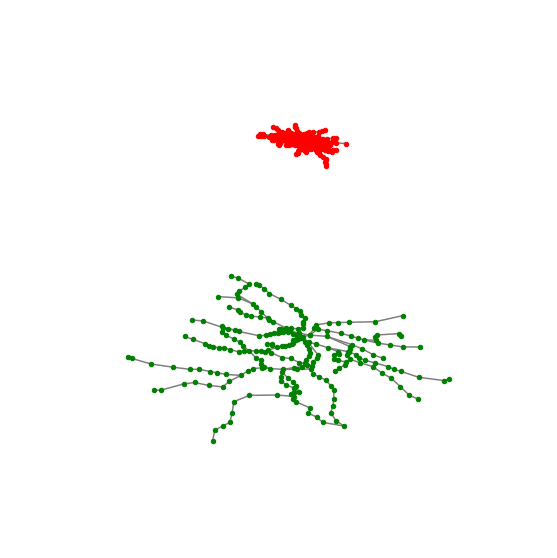

In [81]:
intdNetworkDraw(intd_G_tr_m)

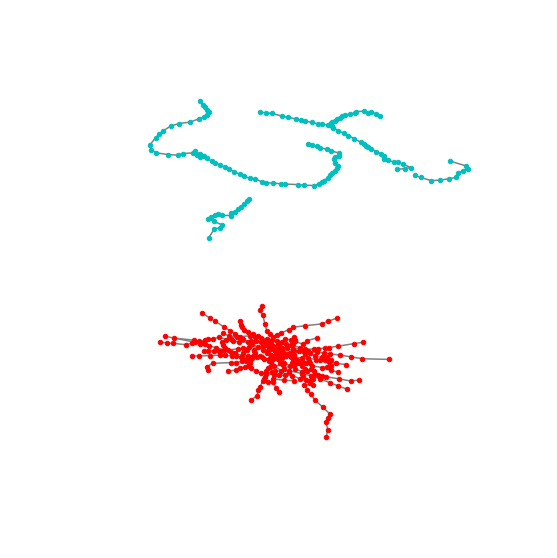

In [82]:
intdNetworkDraw(intd_G_m_trm)

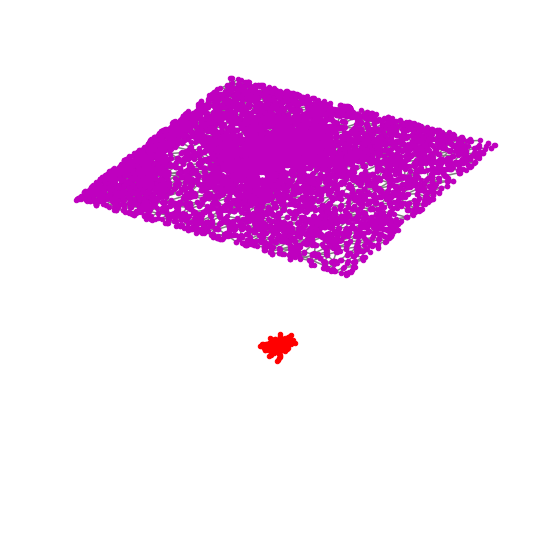

In [76]:
intdNetworkDraw(intd_G_m_r)

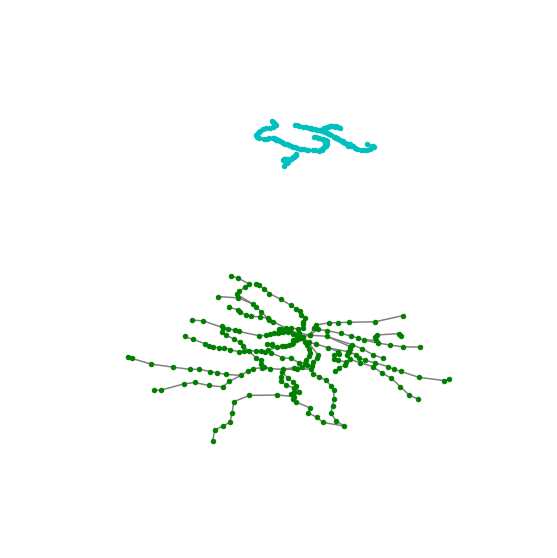

In [77]:
intdNetworkDraw(intd_G_tr_trm)

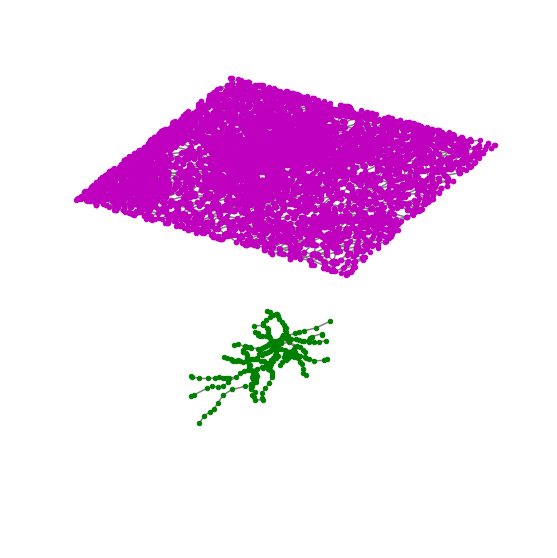

In [78]:
intdNetworkDraw(intd_G_tr_r)

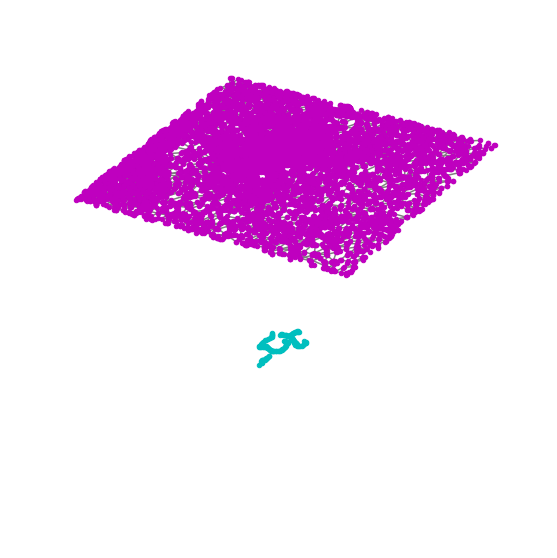

In [79]:
intdNetworkDraw(intd_G_trm_r)

# Archieve

In [96]:
G = nx.read_graphml("../../data/graphml/multigraph.graphml")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/graphml/multigraph.graphml'

In [75]:
df = nx.to_pandas_adjacency(G)

In [72]:
def Filter_RealNetwork (G, filter=['metro','train']):

    H = nx.Graph(G)

    n = list(H.nodes)
    n_id = []

    for i in range(len(filter)):
        _ = []
        for node in H.nodes:
            if H.nodes[node] != {}:
                isFilter = H.nodes[node]['type'] == filter[i]
                if (isFilter):
                    _.append(node)
        n_id.append(_)
    
    for i in range(len(n_id)):
        for j in range(len(n_id[i])):
            n.remove(n_id[i][j])
    
    H.remove_nodes_from(n)
    
    mapping = {}
    for i in range(len(n_id)):
        for j in range(len(n_id[i])):
            mapping[n_id[i][j]] = str(i) + '-' + str(j)
    
    I = nx.relabel_nodes(H, mapping)

    return I

In [73]:
print(len(G.nodes()))
I = Filter_RealNetwork(G,filter = ['metro','train'])
print(len(I.nodes()))

42678
544


In [74]:
df = nx.to_pandas_adjacency(I)